In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('PH-Sales.csv')

In [3]:
dataset

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
dates = pd.date_range(start='2003-01-01',periods=len(dataset),freq='MS')

In [6]:
dataset['Month'] = dates.month

In [7]:
dataset

,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,1
1,Feb-03,157,2
2,Mar-03,185,3
3,Apr-03,199,4
4,May-03,203,5
...,...,...,...
139,Aug-14,848,8
140,Sep-14,640,9
141,Oct-14,581,10
142,Nov-14,519,11


In [8]:
dataset['Year'] = dates.year

In [9]:
dataset

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003
...,...,...,...,...
139,Aug-14,848,8,2014
140,Sep-14,640,9,2014
141,Oct-14,581,10,2014
142,Nov-14,519,11,2014


In [10]:
dates.month_name()

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October',
       ...
       'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December'],
      dtype='object', length=144)

In [11]:
dataset['Month-Name'] = dates.month_name()

In [12]:
dataset

,Month-Year,Number of Tractor Sold,Month,Year,Month-Name
0,Jan-03,141,1,2003,January
1,Feb-03,157,2,2003,February
2,Mar-03,185,3,2003,March
3,Apr-03,199,4,2003,April
4,May-03,203,5,2003,May
...,...,...,...,...,...
139,Aug-14,848,8,2014,August
140,Sep-14,640,9,2014,September
141,Oct-14,581,10,2014,October
142,Nov-14,519,11,2014,November


In [13]:
dataset.rename(columns={"Number of Tractor Sold":"Tractor-Sales"},inplace=True)

In [14]:
dataset

,Month-Year,Tractor-Sales,Month,Year,Month-Name
0,Jan-03,141,1,2003,January
1,Feb-03,157,2,2003,February
2,Mar-03,185,3,2003,March
3,Apr-03,199,4,2003,April
4,May-03,203,5,2003,May
...,...,...,...,...,...
139,Aug-14,848,8,2014,August
140,Sep-14,640,9,2014,September
141,Oct-14,581,10,2014,October
142,Nov-14,519,11,2014,November


In [15]:
dataset.set_index(dates,inplace=True)

In [16]:
dataset

,Month-Year,Tractor-Sales,Month,Year,Month-Name
2003-01-01,Jan-03,141,1,2003,January
2003-02-01,Feb-03,157,2,2003,February
2003-03-01,Mar-03,185,3,2003,March
2003-04-01,Apr-03,199,4,2003,April
2003-05-01,May-03,203,5,2003,May
...,...,...,...,...,...
2014-08-01,Aug-14,848,8,2014,August
2014-09-01,Sep-14,640,9,2014,September
2014-10-01,Oct-14,581,10,2014,October
2014-11-01,Nov-14,519,11,2014,November


In [17]:
dataset = dataset[["Tractor-Sales","Month-Name","Year"]]

In [18]:
dataset

,Tractor-Sales,Month-Name,Year
2003-01-01,141,January,2003
2003-02-01,157,February,2003
2003-03-01,185,March,2003
2003-04-01,199,April,2003
2003-05-01,203,May,2003
...,...,...,...
2014-08-01,848,August,2014
2014-09-01,640,September,2014
2014-10-01,581,October,2014
2014-11-01,519,November,2014


In [19]:
ts_sales = dataset['Tractor-Sales']

In [20]:
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

<AxesSubplot:>

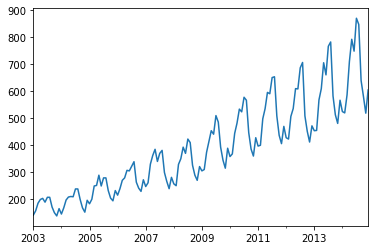

In [21]:
ts_sales.plot()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
decompose = seasonal_decompose(ts_sales)

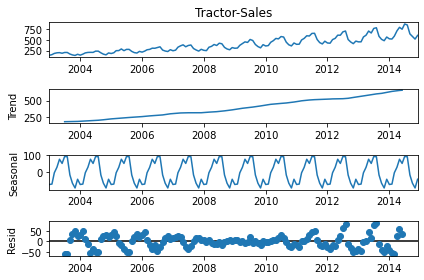

In [24]:
decompose.plot();

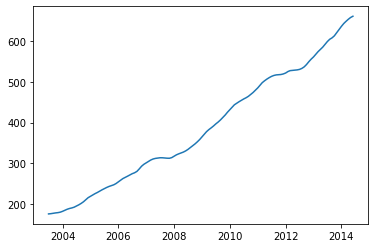

In [25]:
plt.plot(decompose.trend)

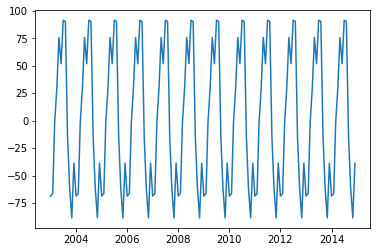

In [26]:
plt.plot(decompose.seasonal)

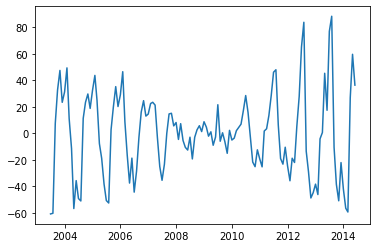

In [27]:
plt.plot(decompose.resid)

#### Simple Moving Average
#### Rolling Stats

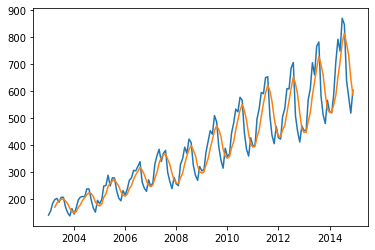

In [28]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=4).mean())

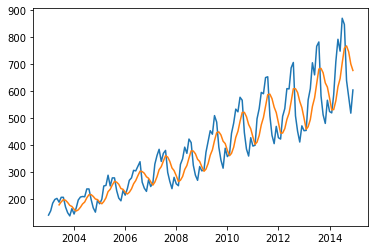

In [29]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=6).mean())

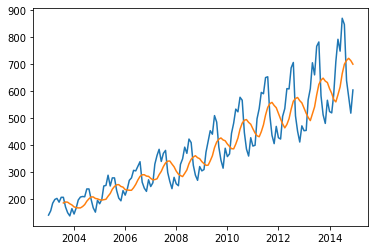

In [30]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=8).mean())

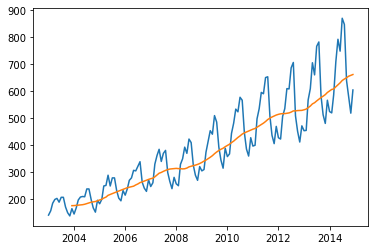

In [31]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=12).mean())

#### Some More Visualization

In [32]:
dataset

,Tractor-Sales,Month-Name,Year
2003-01-01,141,January,2003
2003-02-01,157,February,2003
2003-03-01,185,March,2003
2003-04-01,199,April,2003
2003-05-01,203,May,2003
...,...,...,...
2014-08-01,848,August,2014
2014-09-01,640,September,2014
2014-10-01,581,October,2014
2014-11-01,519,November,2014


In [33]:
pd.pivot(dataset,values="Tractor-Sales",index='Year',columns='Month-Name')

Month-Name,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299
2008,350,410,321,250,257,423,370,329,393,270,289,326
2009,414,486,389,310,305,510,441,374,454,315,345,393
2010,482,567,428,368,358,578,524,444,534,360,386,447
2011,536,654,470,400,397,651,591,498,596,406,437,509


<AxesSubplot:xlabel='Year'>

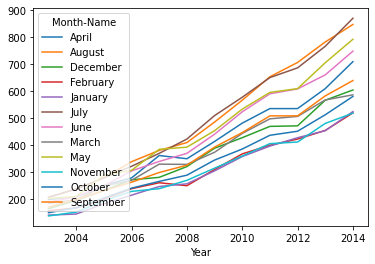

In [34]:
pd.pivot(dataset,values="Tractor-Sales",index='Year',columns='Month-Name').plot()

In [35]:
pd.pivot(dataset,values="Tractor-Sales",index='Month-Name',columns='Year')

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month-Name,,,,,,,,,,,,
April,199,208,251,279,362,350,414,482,536,536,610,710
August,207,238,279,339,381,410,486,567,654,707,783,848
December,165,196,232,272,281,321,389,428,470,472,567,605
February,157,168,200,239,261,250,310,368,400,423,455,520
January,141,145,183,215,247,257,305,358,397,428,454,525
July,207,238,279,322,370,423,510,578,651,687,767,871
June,189,209,249,305,340,370,441,524,591,609,661,749
March,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


<AxesSubplot:xlabel='Month-Name'>

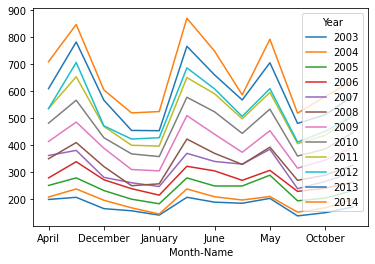

In [36]:
pd.pivot(dataset,values="Tractor-Sales",index='Month-Name',columns='Year').plot()

<AxesSubplot:>

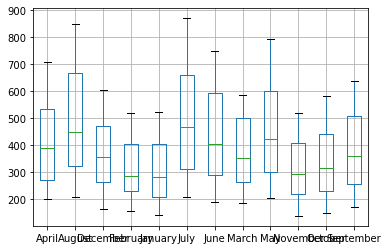

In [37]:
pd.pivot(dataset,values="Tractor-Sales",index='Year',columns='Month-Name').boxplot()

c:\Users\meena\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tractor-Sales', ylabel='Density'>

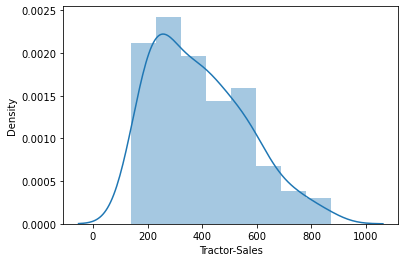

In [38]:
sns.distplot(ts_sales)

In [39]:
from statsmodels.tsa.stattools import adfuller
adfuller(ts_sales)

(1.1088250591467372,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [42]:
def test_stationary(timeseries):
    rolmean = ts_sales.rolling(12).mean()
    rolstd = ts_sales.rolling(12).std()
    # plt.figure(figsize=(18,10))
    plt.grid('both')
    plt.grid(ts_sales)
    plt.plot(rolmean)
    plt.plot(rolstd)

In [49]:
ts_sales = pd.DataFrame(ts_sales)